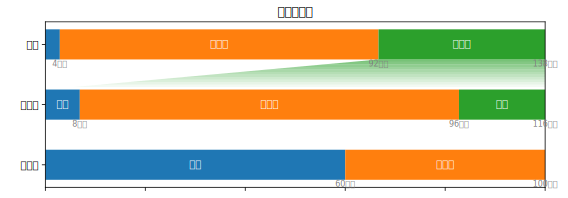

In [211]:
%config InlineBackend.figure_formats = ['svg']

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

matplotlib.rc("font",family='PingFang HK')
plt.rcParams['svg.fonttype'] = 'none'
fig, ax = plt.subplots(figsize=(9, 3))
#ax.grid(axis='x')

myData = [
    ('宇宙',{'':4, '银河系':88, '太阳系':46},'亿年'),
    ('太阳系',{'地球':8, '有机物':88,'氧气':20},'亿年'),
    ('太阳系',{'地球':60, '有机物':40},'亿年'),
]

bar_catlogs = []
bar_labels = []
bar_values = []
uom =[]
max_columns = 0
max_rows = len(myData)
columns = [[0]*max_rows]


# Re-constract the data by columns as needed for plot. And normalize to 100% for each line of bars.
for i in range(max_rows):
    rec = myData[i]
    bar_catlogs.insert(0, rec[0])
    bar_labels.insert(0, list(rec[1].keys()) )
    values = list(rec[1].values())
    bar_values.insert(0, values )
    s = sum(values)
    for j in range(len(values)):
        if j>max_columns-1:
            columns.append([0]*max_rows)
            max_columns += 1
        columns[j][max_rows-i-1] = values[j] * 100 / s
    uom.append(rec[2])

# polt the chart
bar_height = 0.5
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

y_pos = range(max_rows)
start = [0] * max_rows
for c in range(max_columns):
    column = columns[c]
    ax.barh(y_pos, column, left = start, align='center', height=bar_height)
    for r in range(max_rows):
        bar_width = column[r]
        if bar_width > 0:
            key = bar_labels[r][c]
            ax.text(start[r] + bar_width/2, r, key, color='white', va='center', ha='center')
            if r > 0 and key == bar_catlogs[r-1]:
                bar_color = colors[c % len(colors)]

                gradient_steps = 12
                gradient_max = 0.7
                '''
                      p1 ----- p2
                      /        |
                     /         |
                    /          |
                   P4 -------- P3
                '''
                p1 = (start[r],           r-bar_height/2)
                p2 = (start[r]+bar_width, r-bar_height/2)
                p3 = (100, r-1+bar_height/2)
                p4 = (0,   r-1+bar_height/2)

                delta_h = (p1[1] -p4[1]) / gradient_steps
                delta_tran = gradient_max / gradient_steps
                delta_x_left = (p1[0] - p4[0]) /gradient_steps
                delta_x_right = (p3[0] - p2[0]) /gradient_steps
                for i in range(1,gradient_steps):
                    polygon = Polygon([
                        ( p4[0]+delta_x_left*(i+1), p4[1]+delta_h*(i+1) ),
                        ( p3[0]-delta_x_right*(i+1), p3[1]+delta_h*(i+1) ),
                        ( p3[0]-delta_x_right*i, p3[1]+delta_h*i ),
                        ( p4[0]+delta_x_left*i, p4[1]+delta_h*i )
                    ])
                    polygon.set_facecolor(bar_color)
                    polygon.set_alpha(i*delta_tran)
                    ax.add_patch(polygon)

                '''

                points = [(start[r], r-bar_height/2), (start[r]+bar_width, r-bar_height/2),
                          (100, r-1+bar_height/2), (0, r-1+bar_height/2)]
                polygon = Polygon(points)
                polygon.set_facecolor(bar_color)
                polygon.set_alpha(0.5)

                ax.add_patch(polygon)
                '''



                #ax.plot( [start[r],0], [r-bar_height/2,r-1+bar_height/2], color=bar_color, linestyle='--')
                #ax.plot( [start[r]+bar_width,100], [r-bar_height/2,r-1+bar_height/2], color=bar_color, linestyle='--')
            start[r] += bar_width
            val = str(sum(bar_values[r][:c+1])) + uom[r]
            ax.text(start[r], r-(bar_height/2)-.02, val, color='gray', va='top', ha='center', fontsize=8)
            

#plt.plot([1, 5], [3, 3], color='r', linestyle='--')

ax.set_yticks(y_pos)
ax.set_yticklabels(bar_catlogs)
ax.set_xticklabels([])
plt.title('永远有多远')
plt.show()



In [18]:
myData = [
    [('奇点',130), ('银河系',8)],
    [(4, 'd'), (5, 'e'), (6, 'f')],
    [(7, 'g'), (8, 'h'), (9, 'i')]
]

keys = [[element[0] for element in row] for row in myData]
values = [[element[1] for element in row] for row in myData]


print(keys)
print(values)

[['奇点', '银河系'], [4, 5, 6], [7, 8, 9]]
[[130, 8], ['d', 'e', 'f'], ['g', 'h', 'i']]


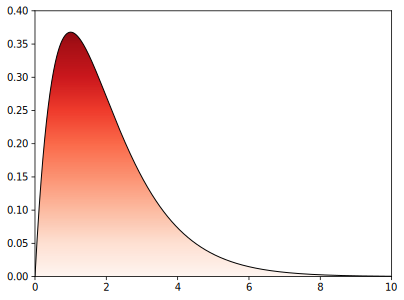

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

xx=np.arange(0,10,0.01)
yy=xx*np.exp(-xx)

path = Path(np.array([xx,yy]).transpose())
patch = PathPatch(path, facecolor='none')
plt.gca().add_patch(patch)

im = plt.imshow(xx.reshape(yy.size,1),  cmap=plt.cm.Reds,interpolation="bicubic",
                origin='lower',extent=[0,10,-0.0,0.40],aspect="auto",clip_path=patch, clip_on=True)
#im.set_clip_path(patch)
plt.show()